In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\lephu\\doan1\\clients.csv")
df.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


In [2]:
df.shape

(1723, 14)

có 14 thuộc tính và 1723 trường hợp

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [4]:
df.isnull().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

không có dữ liệu bị thiếu

In [5]:
print(df.columns)

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having_children_flg', 'region', 'income',
       'family_status', 'phone_operator', 'is_client', 'bad_client_target'],
      dtype='object')


In [6]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Có {} thuộc tính: \n'.format(len(categorical)))
print('',categorical)

Có 4 thuộc tính: 

 ['sex', 'education', 'product_type', 'family_status']


In [7]:
df[categorical].head()

,sex,education,product_type,family_status
0,male,Secondary special education,Cell phones,Another
1,male,Secondary special education,Household appliances,Another
2,female,Secondary special education,Household appliances,Another
3,male,Secondary special education,Cell phones,Unmarried
4,female,Higher education,Cell phones,Married


In [8]:
for var in categorical:
    print(df[var].value_counts())

male      931
female    792
Name: sex, dtype: int64
Secondary special education       836
Higher education                  585
Secondary education               208
Incomplete higher education        86
Incomplete secondary education      5
PhD degree                          3
Name: education, dtype: int64
Cell phones                      498
Household appliances             471
Computers                        178
Furniture                        164
Clothing                          88
Cosmetics and beauty services     55
Windows & Doors                   47
Tourism                           37
Jewelry                           36
Construction Materials            30
Medical services                  27
Fitness                           25
Auto                              21
Boats                             11
Training                          10
Audio & Video                      9
Sporting goods                     6
Garden equipment                   3
Repair Services         

In [9]:
df = pd.get_dummies(df, columns = ['sex','education','product_type','family_status'], drop_first=True)
df.drop(['month','credit_amount','credit_term','age','having_children_flg','region','income'],axis = 1).head()

,phone_operator,is_client,bad_client_target,sex_male,education_Incomplete higher education,education_Incomplete secondary education,education_PhD degree,education_Secondary education,education_Secondary special education,product_type_Auto,...,product_type_Jewelry,product_type_Medical services,product_type_Music,product_type_Repair Services,product_type_Sporting goods,product_type_Tourism,product_type_Training,product_type_Windows & Doors,family_status_Married,family_status_Unmarried
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   month                                       1723 non-null   int64
 1   credit_amount                               1723 non-null   int64
 2   credit_term                                 1723 non-null   int64
 3   age                                         1723 non-null   int64
 4   having_children_flg                         1723 non-null   int64
 5   region                                      1723 non-null   int64
 6   income                                      1723 non-null   int64
 7   phone_operator                              1723 non-null   int64
 8   is_client                                   1723 non-null   int64
 9   bad_client_target                           1723 non-null   int64
 10  sex_male                            

In [11]:
x = df.drop(['bad_client_target'],axis=1)
y = df['bad_client_target']

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 58)

In [13]:
x_train.shape, x_test.shape

((1206, 38), (517, 38))

In [14]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
y_pred = nb.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize = True)

0.8839458413926499

In [17]:
import matplotlib.pyplot as plt

def plot_histogram_and_boxplot(column):
    # Histogram
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    n, bins, patches = axs[0].hist(column, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

    for i in range(len(patches)):
        height = int(patches[i].get_height())
        if height > 0:
            axs[0].text(patches[i].get_x() + patches[i].get_width() / 2, height, str(height), ha='center', va='bottom')

    spines = ['top', 'right']
    for s in spines:
        axs[0].spines[s].set_visible(False)

    axs[0].tick_params(left=False, bottom=False)

    axs[0].set_title(f'Histogram of {column.name}', fontweight='bold', size=14, loc='left')
    axs[0].set_xlabel('Spending ($)', size=12)
    axs[0].set_ylabel('Customer', size=12)

    # Box plot
    axs[1].boxplot(column)

    for i, box in enumerate(axs[1].artists):
        axs[1].text(box.get_x() + box.get_width() / 2, column.iloc[i],
                    str(int(column.iloc[i])), ha='center', va='bottom')

    spines = ['top', 'right']
    for s in spines:
        axs[1].spines[s].set_visible(False)

    axs[1].tick_params(left=False, bottom=False)

    axs[1].set_title(f'Box Plot of {column.name}', fontweight='bold', size=14, loc='left')

    # Display your name at the bottom-left of the entire graph.
    fig.text(0.125, 0.01, "Phan Lac An - 20206109", style='italic')

    plt.show()

In [18]:
from sklearn.metrics import accuracy_score

print('Độ chính xác mô hình: {0:0.4f}'.format(accuracy_score(y_test, y_pred, normalize=True)))

Độ chính xác mô hình: 0.8839


In [19]:
y_pred_train = nb.predict(x_train)

y_pred_train


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
print('Độ chính xác: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Độ chính xác: 0.8872


In [21]:
print('Training set score: {:.4f}'.format(nb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(nb.score(x_test, y_test)))

Training set score: 0.8872
Test set score: 0.8839


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[457   0]
 [ 60   0]]

True Positives(TP) =  457

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  60


<Axes: >

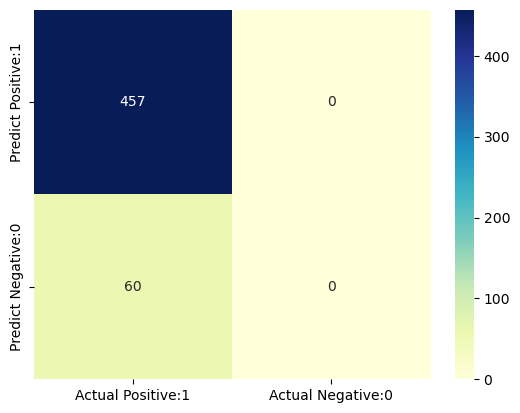

In [23]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
nb.predict_proba(x_test)[0:10, 1]

array([1.51928400e-01, 1.43216839e-01, 7.02118237e-06, 4.55663502e-01,
       2.15547047e-01, 4.57071829e-02, 2.17382732e-01, 2.46071895e-01,
       3.10720122e-01, 3.08900706e-01])

In [25]:
y_pred1 = nb.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Tần số')

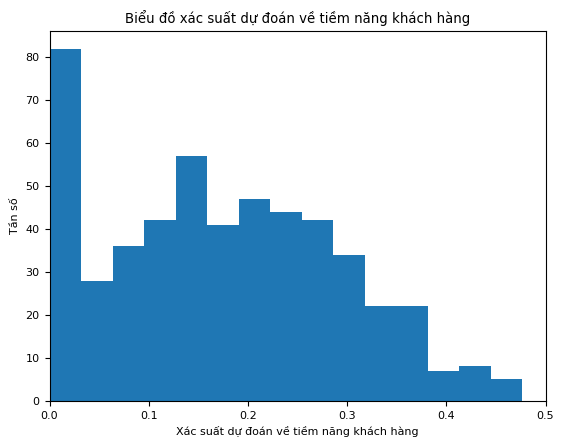

In [26]:
plt.rcParams['font.size'] = 8



plt.hist(y_pred1, bins = 15)



plt.title('Biểu đồ xác suất dự đoán về tiềm năng khách hàng')



plt.xlim(0,0.5)


# set the title
plt.xlabel('Xác suất dự đoán về tiềm năng khách hàng')
plt.ylabel('Tần số')

C:\Users\lephu\anaconda3\envs\doan1\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


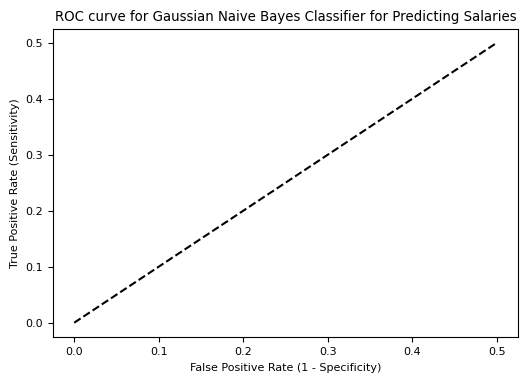

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = '1')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,0.5], [0,0.5], 'k--' )

plt.rcParams['font.size'] = 8

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6611
